In [1]:
# Voer dit blok code uit door met de cursor in het blok te klikken, en vervolgens SHIFT+ENTER in te drukken.

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import sklearn.linear_model as lm


%matplotlib inline

style = {'description_width': '200px'}
slider_layout = Layout(width='50%')

# Hoofdstuk 4 - Klassieke mechanica

Om problemen binnen de klassieke mechanica te modelleren, wordt gebruik gemaakt van de tweede wet van Newton:

$$
a = \dfrac{\sum_i F_ i}{m},
$$

waar de massa, $m\,[\text{kg}]$, en de versnelling, $a\,[\text{m}\text{s}^{-2}]$, van een voorwerp in verband worden gebracht met de som van 
de krachten, $F_i \, [\text{N} \equiv  \text{kg}\text{m}\text{s}^{-2}]$, die op het voorwerp inwerken. Wanneer men zich herinnert dat de versnelling gelijk is aan de tweede-orde afgeleide van de positie van het voorwerp naar de tijd, $a = \dfrac{d^2 x}{dt^2}$, ziet men onmiddellijk in hoe een differentiaalvergelijking hier bekomen wordt.

Omdat het bij het opstellen van een model steeds een uitstekend hulpmiddel is om te kijken of de eenheden van linker- en rechterlid wel overeen komen, en we dus kunnen concluderen dat we alvast geen appelen met eieren vergelijken, is het goed om even na te gaan hoe we de eenheden van een afgeleide kunnen achterhalen. Herinner je de definitie van een [afgeleide](./T3-Afgeleiden/T3-Afgeleiden.ipynb): $\dfrac{dx}{dt} \equiv \lim_{\Delta t \rightarrow 0} \dfrac{x(t+\Delta t) - x(t)}{\Delta t}$. Gaan we de eenheden van het rechterlid na, dan vinden we $\dfrac{\left[\text{m}\right] - \left[\text{m}\right]}{\left[\text{s}\right]}$ en dus $\left[\text{m}\text{s}^{-1}\right]$. Doen we vervolgens hetzelfde voor de tweede-orde afgeleide, $\dfrac{d}{dt}\left(\dfrac{dx}{dt}\right) = \lim_{\Delta t \rightarrow 0} \dfrac{\dfrac{dx}{dt}(t+\Delta t) - \dfrac{dx}{dt}(t)}{\Delta t}$, dan vinden we $\dfrac{\left[\text{m}\text{s}^{-1}\right] - \left[\text{m}\text{s}^{-1}\right]}{\left[\text{s}\right]}$ en dus $\left[\text{m}\text{s}^{-2}\right]$.

## 4.1- Vrije val

Beschouw een voorwerp van massa $m\,[\text{kg}]$ dat in een luchtledige ruimte vanop een bepaalde hoogte vanuit stilstand losgelaten wordt. We noemen de hoogte waarop het voorwerp zich bevindt $x(t)\,[\text{m}]$, stellen dat het voorwerp zich initieel op hoogte $x_0\,[\text{m}]$ bevindt, en leggen de grond op $x=0$. Enkel de gravitatiekracht werkt op het voorwerp in, en deze wordt gegeven door $F_g = - m g$, met $g\,\left[\text{m}\text{s}^{-2}\right]$ de valversnelling, en waar het minteken aanduidt dat ze in de tegenovergestelde richting van de hoogte, en dus onze $x$-as, inwerkt. 

<img src="figs/tikz/klassiekemechanica/vrijeval.png" width=200 />

Op basis van de tweede wet van Newton, $a = \sum_i F_i / m$, waar $a=\dfrac{d^2 x}{dt^2}$ en in dit geval $\sum_i F_i = F_g = - m g$, kunnen we nu een differentiaalvergelijking opstellen die de positie van het voorwerp doorheen de tijd modelleert:
	
$$
	\dfrac{d^2 x}{dt^2} = - g.
$$
	
De initiële hoogte, en de aanname dat het voorwerp vanuit stilstand losgelaten wordt, en dus dat de snelheid van het voorwerp initieel nul is, leveren de initiële condities, $x(0)=x_0$ en $\dfrac{dx}{dt}(0)=0$. Merk de klassieke, contra-intuïtieve conclusie op dat de versnelling van een vallend voorwerp onafhankelijk is van de massa! Wanneer we enkel rekening houden met de zwaartekracht, en dus niet met bijvoorbeeld wrijving met de lucht, valt een pluimpje even snel als een hamer. Dit wordt geïllustreerd in onderstaande video, opgenomen op de maan, waar de atmosfeer dun is, en de wrijving met de lucht verwaarloosbaar klein.

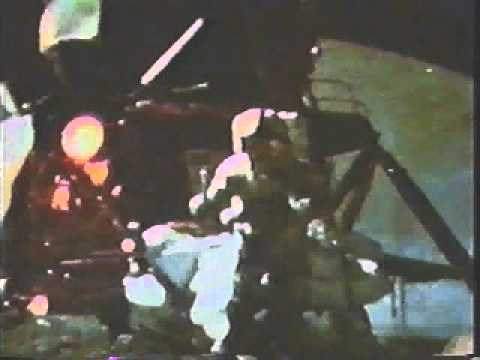

In [6]:
from IPython.display import Audio,Image, YouTubeVideo
id='ZVfhztmK9zI'
YouTubeVideo(id=id,width=600,height=300)

Deze differentiaalvergelijking valt analytisch op te lossen. We verwachten na een eerste integratie, met behulp van een eerste initiële conditie, bij het verloop van de snelheid van het voorwerp, $v=\dfrac{dx}{dt}$, te bekomen, en na een tweede integratie, met een tweede initiële conditie, de positie van het voorwerp in functie van de tijd, $x(t)$, te vinden. 

We merken dat we de veranderlijken kunnen scheiden, en voeren zo een eerste integratie uit:

$$
\begin{align}
		& &\dfrac{d^2 x}{dt^2} &= -  g, \\
		\Leftrightarrow & &\dfrac{d}{dt}\left(\dfrac{d x}{dt} \right) &= -  g, \\
		\Leftrightarrow & &d\left(\dfrac{d x}{dt} \right) &= -  g dt, \\
		\Leftrightarrow & &\int_{\frac{dx}{dt}(0)}^{\frac{dx}{dt}} d\left(\dfrac{d x}{dt} \right) &= \int_{0}^t -  g dt, \\
		\Leftrightarrow & &\dfrac{dx}{dt} - \dfrac{dx}{dt}(0) &=  -  g \left[t-0\right], \\
\end{align}
$$

waarmee we een constante $\dfrac{dx}{dt}(0)$ geïntroduceerd hebben. Herinneren we ons dat de afgeleide van de positie naar de tijd de snelheid is, $dx/dt=v$, dan halen we uit de opgave dat $\dfrac{dx}{dt}(0) = v(0) = 0$, omdat het voorwerp initieel gewoon wordt losgelaten, en dus geen initiële snelheid heeft.  We hebben nu het verloop van de snelheid van het voorwerp doorheen de tijd gevonden,

$$
\dfrac{dx}{dt} = -gt.
$$

Gaan we dan verder met het integreren van deze uitdrukking voor de snelheid:
		
$$		
		\begin{align}
		& &\dfrac{dx}{dt} &=  -  g t, \\
		\Leftrightarrow & &dx  &=  -  g t dt , \\
		\Leftrightarrow & &\int_{x(0)}^{x}dx  &= \int_{0}^{t} -  g t dt , \\
		\Leftrightarrow & & x - x(0) &=  -  g \left[\dfrac{t^2}{2}-0\right] , \\
		\end{align}
$$
		
waar we de tweede initiële conditie $x(0)=x_0$ uit de opgave kunnen gebruiken om uiteindelijk tot 
		
$$
		x = x_0  -  g \dfrac{t^2}{2},
$$
		
te komen.

In onderstaande tabel wordt de valversnelling voor enkele plaatsen gegeven:

| Plaats | $g$ [m s$^{-2}$] |
| --- | --- |
| België | 9.81 |
| Evenaar | 9.78 |
| Maan | 1.62 |
| Zon | 274 |
| Pluto | 0.62 |

* Je laat je vanop één meter boven Pluto naar beneden vallen, hoe lang duurt het eer je de oppervlakte bereikt?
* Aan welke snelheid kom je op de zon aan, als je je vanop één meter boven de oppervlakte van de zon naar beneden laat vallen, uitgedrukt in kilometer per uur?

In [16]:
t=np.sqrt(1/0.62*2)
print(t)

1.7960530202677492


In [14]:
t=np.sqrt(1/274*2)
v=-274*t
print(v)

print(v*3600/1000)

-23.40939982143925
-84.2738393571813


In [26]:
tijdstippen= np.linspace(0,10,100)

def animatie(g,x0):
    
    def x(t):
        return x0-g*t**2/2
    
    def v(t):
        return -g*t
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(tijdstippen,x(tijdstippen))
    ax2.plot(tijdstippen,v(tijdstippen))
       
    ax1.set_ylim(0,40)
    ax1.set_xlabel('$t$ [s]')
    ax1.set_ylabel('$x$ [m]')
    
    ax2.set_ylim(0,-40)
    ax2.set_xlabel('$t$ [s]')
    ax2.set_ylabel('$v$ [m/s]')
    
    fig.tight_layout()
  
interact(animatie
        ,x0=FloatSlider(min=5, max=40, step=5, value=20, description='$x_0$')
        ,g=FloatSlider(min=1, max=10, step=1, value=5, description='$g$'));

interactive(children=(FloatSlider(value=5.0, description='$g$', max=10.0, min=1.0, step=1.0), FloatSlider(valu…

Stel vast dat we het model nooit verteld hebben dat, eens de hoogte $x=0$ bereikt wordt, er plots een enorme weerstand optreedt die de val stopt. De hoogte, $x$, wordt nadat $x=0$ bereikt is, gewoon negatief, en de snelheid blijft in absolute waarde steeds groter worden. Om hiermee rekening te houden, zouden we het model moeten aanpassen, en een gigantische kracht laten inwerken eens $x=0$ is.

## 4.2- Parachutespringen

Parachutisten komen met de schrik vrij, want wrijving met de lucht is wel degelijk een ding op aarde.

De vrije val geeft een vereenvoudigde versie van de werkelijkheid op aarde weer, daar een voorwerp dat naar de aarde toe valt ook een weerstandskracht ondervindt, veroorzaakt door wrijving met de lucht, wat parachutespringen een valabele optie maakt. Beschouw een parachutist, waarop de zwaartekracht, $F_g = -m g$, inwerkt, met $m\,\left[\text{kg}\right]$ de massa van het vallende voorwerp en $g\,\left[\text{m}\text{s}^{-2}\right]$ de valversnelling, evenals een weerstandskracht, $F_d= \dfrac{1}{2} A C_d \rho v^2$, met $A\,\left[\text{m}^2\right]$ de oppervlakte van het vallend voorwerp, loodrecht genomen op de valrichting, $C_d\,\left[-\right]$ de weerstandscoëfficiënt, afhankelijk van het vallend voorwerp, $\rho\,\left[\text{kg}\text{m}^{-3}\right]$, de dichtheid van de lucht, en $v\,\left[\text{m}\text{s}^{-1}\right]$ de snelheid waarmee het voorwerp valt. Stel vast dat $F_d$ steeds positief is, en dus inderdaad de val in de negatieve $x$-richting tegenwerkt. We onderstellen dat de parachutist in een rechte lijn naar beneden valt.

<img src="figs/tikz/klassiekemechanica/parachute.png" width=200 />

Stel een differentiaalvergelijking op die uitdrukt hoe de hoogte van de parachutist verandert doorheen de tijd. Na verloop van tijd zal de snelheid van de parachutist de terminale valsnelheid bereiken, en constant blijven. Hoe hoog is deze terminale valsnelheid?
	
Op basis van de tweede wet van Newton vinden we:

$$
	\begin{align}
	\dfrac{d^2 x }{d t^2} &= \dfrac{\sum_i F_i}{m}, \\
	&= \dfrac{1}{m}\left(F_g + F_d\right),\\
	&= -g + \dfrac{1}{2 m } A C_d \rho v^2,\\
	&= -g + \dfrac{1}{2 m } A C_d \rho \left(\dfrac{d x}{d t}\right)^2,
	\end{align}
$$
	
waar we controleren of linker- en rechterlid inderdaad dezelfde eenheden hebben.
	
In Figuur~\ref{fig:oplParach} zien we een oplossing voor deze vergelijking, bij 

In [ ]:
A=10
g=9.81
m=60
rho=1.2
cd=1.36

def x(t):
    return m/b*np.log(np.cosh(t*np.sqrt(b*g/m)+np.arctanh(v0*np.sqrt(b/m/g))))-x0-m/b*np.log(np.cosh(np.arctanh(v0*np.sqrt(b/m/g))))

Terminale valsnelheid?

## 4.3- Wet van Stokes als derde illustratie?